In [1]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")

advertising

# Sales in thousand units
# Advertisement in thousand dollars

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
# Uncomment to learn more about pd.read_csv
#?pd.read_csv

In [3]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


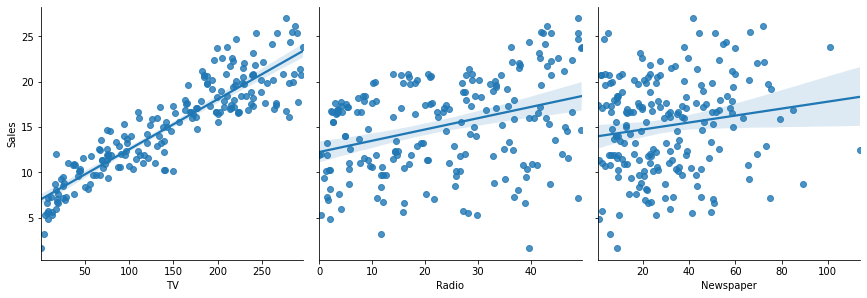

In [4]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='reg')
#sns.pairplot(advertising, size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
?sns.pairplot

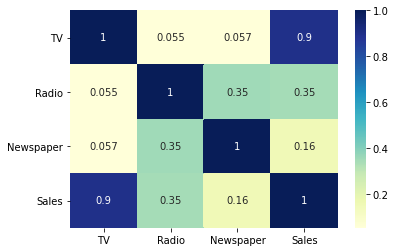

In [5]:

# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [11]:
# Splitting the varaibles as training and testing
# 140 samples for constructing beta_0 and beta_1
# 60 samples as an additional evaluation performance measure (with R^2 and R^2_adj)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=1)


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

Optimal lambda is 0.93


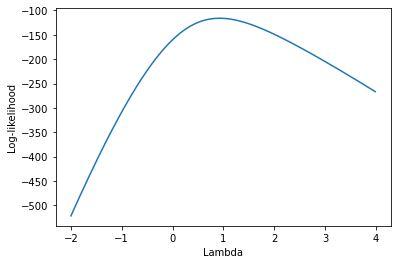

In [61]:
def boxcox_trans(y,lmbda):
    if np.abs(lmbda) == 0:
        return np.log(y)
    z = (y**lmbda-1)/lmbda
    return z

def logL(SSE,lmbda,y):
    n = len(y)
    L = -n/2*np.log(SSE/n) + (lmbda-1)*np.sum(np.log(y))
    # SSE = np.sum((z-z_pred)**2)
    #print(SSE)
    return L

def SSE_func(y,X,beta,lmbda):
    z_pred = np.matmul(X,beta)
    z = boxcox_trans(y,lmbda)
    res = z-z_pred
    return np.sum(res**2)

def y_pred(mdl,X,lmbda):
    z_pred = mdl.predict(X)
    if lmbd == 0:
        return np.exp(z_pred)
    return (lmbda*z_pred+1)**(1/lmbda)

def y_trans(z,lmbda):
    if lmbd == 0:
        return np.exp(z_pred)
    return (lmbda*z_pred+1)**(1/lmbda)

# Box-cox cell
lmbda_list = np.arange(-2,4,.01)

K = len(lmbda_list)

L = np.empty([K,1])
SSE = np.empty([K,1])

j = 0
for lmbda in lmbda_list:
    
    # Step 1: Apply boxcox transformation
    z_train = boxcox_trans(y_train.values,lmbda)
    
    # Step 2: Calculate the beta parameters and run OLS on z_train
    lr = sm.OLS(z_train,X_train_sm).fit()
    
    # Step 3: Calculate SSE
    SSE[j] = SSE_func(y_train,X_train_sm,lr.params,lmbda)
    
    # Step 4: Calculate Log-likeihood
    L[j] = logL(SSE[j],lmbda,y_train)
    
    j = j +1
    
plt.plot(lmbda_list,L)
plt.xlabel('Lambda')
plt.ylabel('Log-likelihood')

# Step 5: Select the best performing log-likelihood
lmbda = lmbda_list[np.where(L==np.max(L))[0]]
print('Optimal lambda is ' + str(np.round(lmbda[0],3)))

In [ ]:
#?train_test_split

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

# Printing the parameters
lr.params

# y = beta_0*1 + beta_1*x

In [ ]:
beta_0 = lr.params[0]
beta_1 = lr.params[1]

y_pred = beta_0*1 + beta_1*X_train

df = pd.DataFrame()

df['X'] = X_train
df['Y'] = y_train
df['beta_0'] = beta_0
df['beta_1'] = beta_1
df['beta_1*X'] = beta_1*X_train
df['Y_hat'] = y_pred
df['Res'] = y_train-y_pred
df['Res_squared'] = (y_train-y_pred)**2 
n_train = len(X_train)
df['MSE'] = np.sum((y_train-y_pred)**2)/(n_train-2)
df

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

In [ ]:
#?sm.OLS

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1]*X_train, 'r')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.show()

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Visualizing the confidence interval
from scipy import stats
n = len(res)
SSE = np.sum(res**2)
MSE = SSE/(n-2)
y_pred = lr.params[0] + lr.params[1]*X_train

# Misc values
t_fac = stats.t.ppf(1-0.025, 138)
x_bar = np.mean(X_train)
s_xx = np.sum((X_train-x_bar)**2)

c_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)
c_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)

p_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)
p_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'g')
plt.plot(X_train, c_low_train, 'r-.')
plt.plot(X_train, p_low_train, 'k-.')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.legend(['Regression Line','95% CI', '95% PI','Observed'],fontsize=12)
plt.plot(X_train, c_up_train, 'r-.')
plt.plot(X_train, p_up_train, 'k-.')
plt.show()

In [ ]:
PI_CI_df = pd.DataFrame()
PI_CI_df['Sales_y'] = y_train
PI_CI_df['TV_x'] = X_train
PI_CI_df['beta_0'] = lr.params[0]
PI_CI_df['beta_1'] = lr.params[1]
PI_CI_df['Sales_pred'] = y_pred
PI_CI_df['t_multiplier'] = stats.t.ppf(1-0.025, 138)
PI_CI_df['MSE'] = MSE
PI_CI_df['S_xx'] = s_xx
PI_CI_df['Lower_CI_tail'] = c_low_train
PI_CI_df['Upper_CI_tail'] = c_up_train
PI_CI_df['Lower_PI_tail'] = p_low_train
PI_CI_df['Upper_PI_tail'] = p_up_train
PI_CI_df

In [ ]:
stats.t.ppf(1-0.025, 138)*np.sqrt(MSE)*np.sqrt(1/n+(X_train[116]-x_bar)**2/s_xx)

In [ ]:
#t_factor = 1.997
t_factor = stats.t.ppf(1-0.025, 138)
#sigma_e_2 = 5.329
print(200*0.7-2)
sigma_e_2 = np.sum(res**2)/138
x_bar = np.mean(X_train)

#y_hat + t_mul*sqrt(sigma_e_2*(1/n + num/den))
#x_h = X_train[37]
x_h = 74.7
num = (x_h-x_bar)**2
den = np.sum((X_train-x_bar)**2)

CI_lower = beta_0*1 + beta_1*x_h - t_factor*np.sqrt(sigma_e_2*(1/n+num/den))
CI_upper = beta_0*1 + beta_1*x_h + t_factor*np.sqrt(sigma_e_2*(1/n+num/den))

PI_lower = beta_0*1 + beta_1*x_h - t_factor*np.sqrt(sigma_e_2*(1+1/n+num/den))
PI_upper = beta_0*1 + beta_1*x_h + t_factor*np.sqrt(sigma_e_2*(1+1/n+num/den))

print(CI_lower)
print(CI_upper)

print(PI_lower)
print(PI_upper)


In [ ]:
19.043-0.487

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = int(np.sqrt(n_train)), kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('True_Sales - Predicted_Sales (Training)', fontsize = 12)
plt.show()

In [ ]:
# QQ-plot: Looking to see if the residuals follows a normal distribution using standardized normal dist quantiles
sm.qqplot(res, line ='s')
plt.title('QQ plot', fontsize=15)
plt.show()

In [ ]:
#?sm.qqplot

In [ ]:
#?sns.distplot

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('TV advertisements')
plt.show()

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('Sample number')
plt.show()

In [ ]:
import scipy
A = scipy.stats.boxcox(y_train,lmbda=np.arange(-2,2,.1))
A

In [ ]:
?A

In [ ]:
#?plt.scatter

In [ ]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [ ]:
?lr.predict

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

res_test = y_test-y_test_pred
SST = np.sum((y_test - np.mean(y_test))**2)
SSE = np.sum(res_test**2)
r_squared_manual = 1-SSE/SST
print(r_squared_manual)
n_test = len(y_test)
MSE = SSE/(n_test-2)
MST = SST/(n_test-1)
r_squared_adjusted = 1-MSE/MST
print(r_squared_adjusted)
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('True Sales (Testing)')
plt.ylabel('Predicted Sales (Testing)')
plt.show()